In [1]:
import pandas as pd
import numpy as np

In [2]:
import ast

**Importing the character metadata**

In [3]:
character_metadata_columns = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]

character_metadata = pd.read_csv('./data/character.metadata.tsv', sep='\t', names=character_metadata_columns)

character_metadata.head()

C:\Users\alexb\AppData\Local\Temp\ipykernel_12276\85889891.py:17: DtypeWarning: Columns (0,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  character_metadata = pd.read_csv('./data/character.metadata.tsv', sep='\t', names=character_metadata_columns)


Wikipedia movie ID  Freebase movie ID  Movie release date  \
0      wiki_movie_id  freebase_movie_id  movie_release_date   
1             975900          /m/03vyhn          2001-08-24   
2             975900          /m/03vyhn          2001-08-24   
3             975900          /m/03vyhn          2001-08-24   
4             975900          /m/03vyhn          2001-08-24   

               Character name Actor date of birth  Actor gender  \
0              character_name    actor_birth_date  actor_gender   
1                    Akooshay          1958-08-26             F   
2  Lieutenant Melanie Ballard          1974-08-15             F   
3         Desolation Williams          1969-06-15             M   
4          Sgt Jericho Butler          1967-09-12             M   

  Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
0           actor_height_m            actor_ethnicity_id          actor_name   
1                     1.62                           NaN      Wanda De Jesus   
2                     1.78                    /m/044038p  Natasha Henstridge   
3                    1.727                       /m/0x67            Ice Cube   
4                     1.75                           NaN       Jason Statham   

  Actor age at movie release Freebase character/actor map ID  \
0       actor_age_at_release               char_actor_map_id   
1                       42.0                      /m/0bgchxw   
2                       27.0                       /m/0jys3m   
3                       32.0                       /m/0jys3g   
4                       33.0                      /m/02vchl6   

  Freebase character ID  Freebase actor ID  
0      freebase_char_id  freebase_actor_id  
1            /m/0bgcj3x         /m/03wcfv7  
2            /m/0bgchn4          /m/0346l4  
3            /m/0bgchn_         /m/01vw26l  
4            /m/0bgchnq          /m/034hyc

**Importing the movie metadata**

In [4]:
# Load the character metadata
movie_metadata_columns = [
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date",
    "Movie box office revenue", 
    "Movie runtime", 
    "Languages", 
    "Countries", 
    "Genres"
]

movie_metadata = pd.read_csv('./data/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)

movie_metadata.head()

C:\Users\alexb\AppData\Local\Temp\ipykernel_12276\1536891884.py:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movie_metadata = pd.read_csv('./data/movie.metadata.tsv', sep='\t', header=None, names=movie_metadata_columns, encoding='utf-8', error_bad_lines=False)


Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name Movie release date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie box office revenue  Movie runtime  \
0                14010832.0           98.0   
1                       NaN           95.0   
2                       NaN           83.0   
3                       NaN          110.0   
4                       NaN          106.0   

                            Languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/05f_3": "Norwegian Language"}   
3  {"/m/02h40lc": "English Language"}   
4   {"/m/04306rv": "German Language"}   

                                   Countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                              Genres  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}

In [5]:
def parse_encoded_col(encoded_str):
    try:
        return ast.literal_eval(encoded_str)
    except (ValueError, SyntaxError):
        return {}

In [6]:
# Apply the parse_encoded_col function to relevant columns
movie_metadata['Languages'] = movie_metadata['Languages'].apply(parse_encoded_col)
movie_metadata['Countries'] = movie_metadata['Countries'].apply(parse_encoded_col)
movie_metadata['Genres'] = movie_metadata['Genres'].apply(parse_encoded_col)

# Extract values from the dictionaries (as lists)
movie_metadata['Languages'] = movie_metadata['Languages'].apply(lambda x: list(x.values()))
movie_metadata['Countries'] = movie_metadata['Countries'].apply(lambda x: list(x.values()))
movie_metadata['Genres'] = movie_metadata['Genres'].apply(lambda x: list(x.values()))

# Display the parsed columns
movie_metadata[['Movie name', 'Languages', 'Countries', 'Genres']].head()

Movie name             Languages  \
0                                     Ghosts of Mars    [English Language]   
1  Getting Away with Murder: The JonBenét Ramsey ...    [English Language]   
2                                        Brun bitter  [Norwegian Language]   
3                                   White Of The Eye    [English Language]   
4                                  A Woman in Flames     [German Language]   

                    Countries  \
0  [United States of America]   
1  [United States of America]   
2                    [Norway]   
3            [United Kingdom]   
4                   [Germany]   

                                              Genres  
0  [Thriller, Science Fiction, Horror, Adventure,...  
1   [Mystery, Biographical film, Drama, Crime Drama]  
2                             [Crime Fiction, Drama]  
3  [Thriller, Erotic thriller, Psychological thri...  
4                                            [Drama]

In [7]:
movie_metadata.head()


Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name Movie release date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie box office revenue  Movie runtime             Languages  \
0                14010832.0           98.0    [English Language]   
1                       NaN           95.0    [English Language]   
2                       NaN           83.0  [Norwegian Language]   
3                       NaN          110.0    [English Language]   
4                       NaN          106.0     [German Language]   

                    Countries  \
0  [United States of America]   
1  [United States of America]   
2                    [Norway]   
3            [United Kingdom]   
4                   [Germany]   

                                              Genres  
0  [Thriller, Science Fiction, Horror, Adventure,...  
1   [Mystery, Biographical film, Drama, Crime Drama]  
2                             [Crime Fiction, Drama]  
3  [Thriller, Erotic thriller, Psychological thri...  
4                                            [Drama]

In [8]:
#I now have movie_metadata's Genres column which has lists of Genres. I need to find the number of unique Genres in this column accross all rows:
unique_genre_list = []
for row in movie_metadata['Genres']:
    for genre in row:
        if genre not in unique_genre_list:
            unique_genre_list.append(genre)
print(len(unique_genre_list))

363


In [9]:
genre_mapping_dict = {
    "Softcore Porn": ["Adult"],
    "Prison film": ["Prison"],
    "Pinku eiga": ["Adult", "Japanese", "Asian"],
    "Inventions & Innovations": None, 
    "Bruceploitation": ["Martial Arts", "Exploitation", "Low Budget"],
    "Tollywood": ["Indian", "Asian"],
    "Instrumental Music": ["Music/Dance"],
    "Splatter film": ["Horror"],
    "Female buddy film": ["Adventure", "Comedy", "Women"],
    "Detective fiction": ["Crime", "Thriller"],                 # 10
    "Dystopia": ["Dystopia"],
    "Black comedy": ["Comedy"],
    "History": ["History"],
    "Silhouette animation": ["Animation"],
    "Combat Films": ["Action"],
    "Educational": ["Educational"],
    "Heaven-Can-Wait Fantasies": None,
    "Outlaw": ["Crime"],
    "Marriage Drama": ["Drama", "Women"],
    "Health & Fitness": ["Sport"],                              # 20
    "Stand-up comedy": ["Comedy"],
    "Sci-Fi Adventure": ["Science Fiction", "Adventure"],
    "Road-Horror": ["Horror"],
    "Anthology": ["Anthology"],
    "Biography": ["Biography"],
    "Doomsday film": ["Dystopia"],
    "Malayalam Cinema": ["Indian"],
    "Musical comedy": ["Musical", "Comedy"],
    "Chick flick": ["Romance", "Teen", "Women"],
    "Action/Adventure": ["Action", "Adventure"],                # 30
    "Horror Comedy": ["Horror", "Comedy"],
    "Spaghetti Western": ["Western", "European"],
    "Crime Drama": ["Crime", "Drama"],
    "Monster": ["Horror"],
    "Kafkaesque": ["Dystopian", "Psychological"],
    "Filipino": ["Filipino", "Asian"],
    "Movie serial": ["Action"],
    "War effort": ["Politics", "War"],
    "Extreme Sports": ["Sports"],
    "Sex comedy": ["Adult", "Comedy"],                        # 40
    "Documentary": ["Documentary"], 
    "B-Western": ["Western", "Low Budget"],
    "Existentialism": ["Philosophical"],
    "Demonic child": ["Horror"],
    "Buddy film": ["Adventure", "Comedy"],
    "Early Black Cinema": ["Black Cinema"],
    "Therimin music": ["Music/Dance"],
    "Coming-of-age film": ["Social"],
    "Sexploitation": ["Adult", "Exploitation", "Low Budget"],
    "Outlaw biker film": ["Crime"],                         # 50
    "Gross out": ["Horror"],
    "Drama": ["Drama"],
    "Neorealism": ["Art Film"],
    "Christmas movie": ["Holidays"],
    "British New Wave": ["Art Film", "European"],
    "Comedy of Errors": ["Comedy"],
    "Computer Animation": ["Animation"],
    "Children's/Family": ["Kids", "Family"],
    "Surrealism": ["Art Film"],
    "Suspense": ["Thriller"],                               # 60
    "Dogme 95": ["Avant-Garde"],
    "Family Film": ["Family"],
    "Stop motion": ["Stop Motion"],
    "Mockumentary": ["Documentary"],
    "Ealing Comedies": ["Comedy"],
    "Czechoslovak New Wave": ["Art Film", "European"],
    "Archives and records": ["History"],
    "Social issues": ["Social"],
    "Environmental Science": ["Nature", "Educational"],
    "Short Film": ["Short Film"],                           # 70
    "Religious Film": ["Religious"],
    "The Netherlands in World War II": ["History", "War"],
    "Propaganda film": ["Politics"],
    "Historical Epic": ["History", "Epic"],
    "Action": ["Action"],
    "Horror": ["Horror"],
    "C-Movie": ["Low Budget"],
    "Film-Opera": ["Music/Dance"],
    "Period piece": ["History", "Drama"],
    "Silent film": ["Silent"],                              # 80
    "Political thriller": ["Politics", "Thriller"],
    "Absurdism": ["Art Film", "Philosophical"],
    "Gulf War": ["History", "War"],
    "Humour": ["Comedy"],
    "Sports": ["Sports"],
    "Bollywood": ["Indian"],
    "Historical Documentaries": ["History", "Documentary"],
    "Tokusatsu": ["Japanese"],
    "Road movie": ["Adventure"],
    "Conspiracy fiction": ["Politics", "Fiction"],          # 90
    "Punk rock": ["Music/Dance"],
    "Singing cowboy": ["Music/Dance", "Western"],
    "Breakdance": ["Music/Dance"],
    "Fictional film": ["Fiction"],
    "Feature film": None,
    "Epic": ["Epic"],
    "Journalism": ["Politics"],
    "Buddy Picture": ["Adventure", "Comedy"],
    "Children's Issues": ["Social"],
    "Family-Oriented Adventure": ["Family", "Adventure"],   # 100
    "Psychological thriller": ["Psychological", "Thriller"],
    "Children's": ["Kids"],
    "Z movie": ["Low Budget"],
    "Statutory rape": ["Adult"],
    "Mumblecore": ["Low Budget"],
    "Nature": ["Nature"],
    "Teen": ["Teen"],
    "Superhero movie": ["Action", "Science Fiction"],
    "Biographical film": ["Biography"],
    "British Empire Film": ["History", "War"],              # 110
    "Experimental film": ["Avant-Garde"],
    "Courtroom Drama": ["Drama"],
    "Comedy of manners": ["Comedy"],
    "Homoeroticism": ["LGBTQ", "Adult"],
    "Musical Drama": ["Musical", "Drama"],
    "Backstage Musical": ["Music/Dance"],
    "Screwball comedy": ["Romance", "Comedy"],
    "Libraries and librarians": None,
    "Erotica": ["Adult"],
    "Plague": ["Dystopian"],                                # 120
    "Martial Arts Film": ["Martial Arts"],
    "Slice of life story": ["Biography"],
    "Satire": ["Comedy"],
    "Animal Picture": ["Animation"],
    "LGBT": ["LGBTQ"],
    "Film adaptation": ["Film Adaptation"],
    "Alien Film": ["Horror"],
    "Boxing": ["Sports"],
    "Vampire movies": ["Horror"],
    "Parkour in popular culture": ["Sports"],               # 130
    "Whodunit": ["Crime"],
    "Revisionist Western": ["Western"],
    "World History": ["History"],
    "News": ["Politics"],
    "Political satire": ["Politics", "Comedy"],
    "Costume Horror": ["Horror"],
    "Linguistics": None,
    "Alien invasion": ["Horror"],
    "Indie": ["Independent"],
    "Master Criminal Films": ["Crime"],                     # 140
    "Anime": ["Animated", "Japanese"],
    "Haunted House Film": ["Horror"],
    "Baseball": ["Sport"],
    "Erotic thriller": ["Adult", "Thriller"],
    "B-movie": ["Low Budget"],
    "Foreign legion": ["War", "History"],
    "Biker Film": ["Sport"],
    "Political Documetary": ["Politics", "Documentary"],
    "Social problem film": ["Social"],
    "Detective": ["Crime"],                                 # 150
    "Blaxploitation": ["Black Cinema", "Exploitation", "Low Budget"],
    "Gangster Film": ["Crime"],
    "Education": ["Educational"],
    "Romantic drama": ["Romance", "Drama", "Women"],
    "Auto racing": ["Cars"],
    "Gender Issues": ["Gender Issues", "Social"],
    "Period Horror": ["Horror"],
    "Inspirational Drama": ["Drama"],
    "Fantasy": ["Fantasy"],
    "Airplanes and airports": None,                         # 160
    "Swashbuckler films": ["Action"],
    "Time travel": ["Science Fiction"],
    "Romantic fantasy": ["Romance", "Fantasy"],
    "Beach Party film": ["Beach"],
    "Comedy-drama": ["Comedy", "Drama"],
    "Americana": ["USA"],
    "Business": None,
    "Illnesses & Disabilities": ["Social", "Medical"],
    "Nuclear warfare": ["Dystopian", "War"],
    "Crime Thriller": ["Crime", "Thriller"],                # 170
    "Steampunk": ["Science Fiction", "Futuristic"],
    "Children's Entertainment": ["Kids"],
    "Anti-war": ["Social", "War"],
    "Star vehicle": ["Start Vehicle"],
    "Feminist Film": ["Feminism"],
    "Gay Themed": ["LGBTQ"],
    "World cinema": ["World Cinema"],
    "Chase Movie": ["Action", "Cars"],
    "Hip hop movies": ["Music/Dance", "Black Cinema"],
    "Gothic Film": ["Horror", "Art Film"],                  # 180
    "Children's Fantasy": ["Fantasy", "Kids"],
    "Film noir": ["Crime", "Drama"],
    "Romantic comedy": ["Romance", "Comedy"],
    "Western": ["Western"],
    "Caper story": ["Crime"],
    "Samurai cinema": ["Action", "Japanese"],
    "Animated Musical": ["Animated", "Music/Dance"],
    "Cult": ["Religious"],
    "Science Fiction": ["Science Fiction"],
    "Crime Fiction": ["Crime", "Fiction"],
    "Disaster": ["Dystopian"],                            # 190
    "Indian Western": ["Indian"],
    "Black-and-white": ["Black and White"],
    "Sponsored film": ["Sponsored"],
    "Psychological horror": ["Psychological", "Horror"],
    "Television movie": ["Television"],
    "Legal drama": ["Social", "Drama"],
    "Addiction Drama": ["Drama"],
    "Fan film": None,
    "Culture & Society": ["Social"],                  # 200
    "Sci Fi Pictures original films": ["Science Fiction"],
    "Heist": ["Crime"],
    "Docudrama": ["Documentary", "Drama"],
    "Buddy cop": ["Crime", "Adventure"],
    "Spy": ["Crime"],
    "Animation": ["Animation"],
    "Horse racing": ["Sports"],
    "Superhero": ["Action", "Science Fiction"],
    "Cold War": ["History"],
    "Dance": ["Music/Dance"],                      # 210
    "Goat gland": None,
    "Tragedy": ["Drama"],
    "Finance & Investing": None,
    "Film": None,
    "Anti-war film": ["Social", "War"],
    "Graphic & Applied Arts": None,
    "Pornography": ["Adult"],
    "Escape Film": ["Prison"],
    "Language & Literature": ["Literary"],
    "Bengali Cinema": ["Social", "Indian", "Asian"],                 # 220
    "Essay Film": ["Literary"],
    "Family & Personal Relationships": ["Social"],
    "Private military company": None,
    "Crime Comedy": ["Crime", "Comedy"],
    "Mystery": ["Thriller"],
    "Zombie Film": ["Horror", "Dystopian"],
    "Concert film": ["Music/Dance"],
    "Media Studies": ["Social"],
    "Anthropology": ["Social"],
    "Hybrid Western": ["Western"],
    "Heavenly Comedy": ["Comedy"],
    "Ensemble Film": ["Ensemble"],
    "Comedy": ["Comedy"],
    "Women in prison films": ["Prison"],
    "Space western": ["Western", "Science Fiction"],
    "Thriller": ["Thriller"],
    "Workplace Comedy": ["Comedy"],
    "Gay": ["LGBTQ"],
    "Animated cartoon": ["Animated"],
    "Fantasy Adventure": ["Fantasy", "Adventure"],
    "Music": ["Music/Dance"],
    "Supermarionation": None,
    "Adventure Comedy": ["Adventure", "Comedy"],
    "Art film": ["Art Film"],
    "Science fiction Western": ["Western", "Science Fiction"],
    "Sword and sorcery films": ["Science Fiction"],
    "Historical fiction": ["History", "Fiction"],
    "Glamorized Spy Film": ["Crime"],
    "Future noir": ["Crime", "Drama", "Science Fiction"],
    "Christian film": ["Religious"],
    "Childhood Drama": ["Drama"],
    "Erotic Drama": ["Adult", "Drama"],
    "Kitchen sink realism": ["Art Film"],
    "Fantasy Comedy": ["Fantasy", "Comedy"],
    "Clay animation": ["Stop Motion"],
    "Romantic thriller": ["Romance", "Thriller"],
    "Gay pornography": ["Adult", "LGBTQ"],
    "Filipino Movies": ["Filipino", "Asian"],
    "Comedy Thriller": ["Comedy", "Thriller"],
    "Biopic [feature]": ["Biography"],
    "Ninja movie": ["Action"],
    "Comedy Western": ["Comedy", "Western"],
    "Epic Western": ["Epic", "Western"],
    "Wuxia": ["Martial Arts", "Chinese"],
    "Prison escape": ["Prison"],
    "Tamil cinema": ["Indian"],
    "Pornographic movie": ["Adult"],
    "Media Satire": ["Politics", "Comedy"],
    "Supernatural": ["Science Fiction"],
    "Albino bias": None,
    "Movies About Gladiators": ["Action", "History"],
    "Action Comedy": ["Action", "Comedy"],
    "Werewolf fiction": ["Horror", "Fiction"],
    "Space opera": ["Science Fiction"],
    "Latino": ["Latino"],
    "Reboot": ["Reboot"],
    "Revisionist Fairy Tale": None,
    "Animals": ["Nature"],
    "Albino bias": None,
    "Action Comedy": ["Action", "Comedy"],
    "Werewolf fiction": ["Horror", "Fiction"],
    "Space opera": ["Science Fiction"],
    "Reboot": ["Reboot"],
    "Revisionist Fairy Tale": None,
    "Animals": ["Nature"],
    "Sci-Fi Thriller": ["Science Fiction", "Thriller"],
    "Political drama": ["Politics", "Drama"],
    "Mondo film": ["Documentary", "Horror"],
    "Costume Adventure": ["Adventure"],
    "Giallo": ["Thriller", "Psychological", "Horror"],
    "Sword and Sandal": ["History"],
    "Adult": ["Adult"],
    "Expressionism": ["Art Film"],
    "Gross-out film": ["Horror"],
    "Fairy tale": ["Science Fiction"],
    "Tragicomedy": ["Drama", "Comedy"],
    "Point of view shot": None,
    "Chinese Movies": ["Chinese"],
    "Slapstick": ["Comedy"],
    "Northern": ["Western"],
    "Sword and sorcery": ["Science Fiction", "Adventure"],
    "Prison": ["Prison"],
    "Courtroom Comedy": ["Social", "Comedy"],
    "Coming of age": ["Social"],
    "School story": ["Social"],
    "New Queer Cinema": ["LGBTQ"],
    "Comdedy": ["Comedy"],
    "Exploitation": ["Exploitation", "Low Budget"],
    "Crime": ["Crime"],
    "Revenge": ["Drama"],
    "Costume drama": ["Drama"],
    "Medical fiction": ["Medical", "Fiction"],
    "Avant-garde": ["Avant-Garde"],
    "Parody": ["Comedy"],
    "Action Thrillers": ["Action", "Thrillers"],
    "Apocalyptic and post-apocalyptic fiction": ["Dystopian", "Fiction"],
    "Hagiography": ["Religious"],
    "Creature Film": ["Horror"],
    "New Hollywood": ["USA"],
    "Adventure": ["Adventure"],
    "Jukebox musical": ["Music/Dance"],
    "Interpersonal Relationships": ["Social"],
    "Acid western": ["Western"],
    "Law & Crime": ["Social", "Crime"],
    "Juvenile Delinquency Film": ["Crime"],
    "Race movie": ["Cars"],
    "Natural disaster": ["Nature"],
    "Slasher": ["Horror"],
    "Live action": ["Animation"],
    "Monster movie": ["Horror"],
    "Jungle Film": ["Nature"],
    "Bloopers & Candid Camera": None,
    "Sci-Fi Horror": ["Science Fiction", "Horror"],
    "Operetta": ["Music/Dance", "Art Film"],
    "Fantasy Drama": ["Fantasy", "Drama"],
    "Melodrama": ["Drama"],
    "Stoner film": ["Comedy"],
    "Psycho-biddy": ["Horror", "Thriller"],
    "Rockumentary": ["Music/Dance", "Documentary"],
    "War film": ["War"],
    "Archaeology": None,
    "Holiday Film": ["Holidays"],
    "Filmed Play": None,
    "Family Drama": ["Drama"],
    "Natural horror films": ["Nature", "Horror"],
    "Musical": ["Music/Dance"],
    "Political cinema": ["Politics"],
    "Cyberpunk": ["Science Fiction", "Dystopian", "Futuristic"],
    "Romance Film": ["Romance"],
    "Comedy horror": ["Comedy", "Horror"],
    "Roadshow/Carny": ["Art Film"],
    "Remake": ["Remake"],
    "Domestic Comedy": ["Comedy"],
    "Beach Film": ["Beach"],
    "Pre-Code": ["USA"],
    "Roadshow theatrical release": None,
    "Comedy film": ["Comedy"],
    "Travel": None,
    "Computers": None,
    "Historical drama": ["History", "Drama"],
    "Film & Television History": ["History"],
    "Neo-noir": ["Crime", "Drama"],
    "Gay Interest": ["LBGTQ"],
    "Hardcore pornography": ["Adult"],
    "Mythological Fantasy": ["Fantasy", "Fiction"],
    "Camp": ["Art Film"],
    "Film à clef": ["Fiction"],
    "Patriotic film": ["USA", "Propaganda"],
    "Japanese Movies": ["Japanese", "Asian"],
    "Cavalry Film": ["Western", "USA"],
}

In [10]:
# Assuming movie_metadata is your existing DataFrame and it has a 'Genres' column with the old genres
# Also assuming genre_mapping_dict is the dictionary with your genre mappings

# Define the mapping function
def map_genres(old_genres_list, mapping_dict):
    new_genres_list = []
    for genre in old_genres_list:
        # Get the new genres from the dictionary, if not found or None, it will return an empty list
        mapped = mapping_dict.get(genre, [])
        if mapped is not None:
            new_genres_list.extend(mapped)
    # Return the unique genres after mapping
    return list(set(new_genres_list))

# Map the genres for each movie in the DataFrame
movie_metadata['Genres Reduced'] = movie_metadata['Genres'].apply(lambda x: map_genres(x, genre_mapping_dict))

# This will add the 'Genres Reduced' column to the movie_metadata DataFrame


In [11]:
movie_metadata.head()

Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name Movie release date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie box office revenue  Movie runtime             Languages  \
0                14010832.0           98.0    [English Language]   
1                       NaN           95.0    [English Language]   
2                       NaN           83.0  [Norwegian Language]   
3                       NaN          110.0    [English Language]   
4                       NaN          106.0     [German Language]   

                    Countries  \
0  [United States of America]   
1  [United States of America]   
2                    [Norway]   
3            [United Kingdom]   
4                   [Germany]   

                                              Genres  \
0  [Thriller, Science Fiction, Horror, Adventure,...   
1   [Mystery, Biographical film, Drama, Crime Drama]   
2                             [Crime Fiction, Drama]   
3  [Thriller, Erotic thriller, Psychological thri...   
4                                            [Drama]   

                                      Genres Reduced  
0  [Science Fiction, Western, Action, Adventure, ...  
1                [Crime, Thriller, Biography, Drama]  
2                            [Crime, Fiction, Drama]  
3                   [Psychological, Thriller, Adult]  
4                                            [Drama]

In [12]:
unique_genre_list = []
for row in movie_metadata['Genres Reduced']:
    for genre in row:
        if genre not in unique_genre_list:
            unique_genre_list.append(genre)
print(len(unique_genre_list))

78


In [13]:
movie_metadata.describe()

Wikipedia movie ID  Movie box office revenue  Movie runtime
count        8.174100e+04              8.401000e+03   6.129100e+04
mean         1.740784e+07              4.799363e+07   1.118192e+02
std          1.098791e+07              1.121753e+08   4.360070e+03
min          3.300000e+02              1.000000e+04   0.000000e+00
25%          7.323695e+06              2.083193e+06   8.100000e+01
50%          1.777899e+07              1.063969e+07   9.300000e+01
75%          2.715573e+07              4.071696e+07   1.060000e+02
max          3.750192e+07              2.782275e+09   1.079281e+06

In [14]:
movie_meta_v2 = movie_metadata[movie_metadata['Genres Reduced'].map(len) > 0]

In [15]:
movie_meta_v2.describe()

Wikipedia movie ID  Movie box office revenue  Movie runtime
count        7.943500e+04              8.392000e+03   6.081000e+04
mean         1.720032e+07              4.802913e+07   1.116905e+02
std          1.093771e+07              1.122276e+08   4.377231e+03
min          3.300000e+02              1.000000e+04   0.000000e+00
25%          7.220702e+06              2.081215e+06   8.100000e+01
50%          1.743276e+07              1.065953e+07   9.300000e+01
75%          2.673575e+07              4.079595e+07   1.060000e+02
max          3.750192e+07              2.782275e+09   1.079281e+06

In [16]:
character_metadata.head()

Wikipedia movie ID  Freebase movie ID  Movie release date  \
0      wiki_movie_id  freebase_movie_id  movie_release_date   
1             975900          /m/03vyhn          2001-08-24   
2             975900          /m/03vyhn          2001-08-24   
3             975900          /m/03vyhn          2001-08-24   
4             975900          /m/03vyhn          2001-08-24   

               Character name Actor date of birth  Actor gender  \
0              character_name    actor_birth_date  actor_gender   
1                    Akooshay          1958-08-26             F   
2  Lieutenant Melanie Ballard          1974-08-15             F   
3         Desolation Williams          1969-06-15             M   
4          Sgt Jericho Butler          1967-09-12             M   

  Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
0           actor_height_m            actor_ethnicity_id          actor_name   
1                     1.62                           NaN      Wanda De Jesus   
2                     1.78                    /m/044038p  Natasha Henstridge   
3                    1.727                       /m/0x67            Ice Cube   
4                     1.75                           NaN       Jason Statham   

  Actor age at movie release Freebase character/actor map ID  \
0       actor_age_at_release               char_actor_map_id   
1                       42.0                      /m/0bgchxw   
2                       27.0                       /m/0jys3m   
3                       32.0                       /m/0jys3g   
4                       33.0                      /m/02vchl6   

  Freebase character ID  Freebase actor ID  
0      freebase_char_id  freebase_actor_id  
1            /m/0bgcj3x         /m/03wcfv7  
2            /m/0bgchn4          /m/0346l4  
3            /m/0bgchn_         /m/01vw26l  
4            /m/0bgchnq          /m/034hyc

In [17]:
#we want to drop the first row of character_metadata because it is a duplicate of the column names
character_metadata = character_metadata.drop(0)
character_metadata.head()

Wikipedia movie ID Freebase movie ID Movie release date  \
1             975900         /m/03vyhn         2001-08-24   
2             975900         /m/03vyhn         2001-08-24   
3             975900         /m/03vyhn         2001-08-24   
4             975900         /m/03vyhn         2001-08-24   
5             975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor gender  \
1                    Akooshay          1958-08-26            F   
2  Lieutenant Melanie Ballard          1974-08-15            F   
3         Desolation Williams          1969-06-15            M   
4          Sgt Jericho Butler          1967-09-12            M   
5             Bashira Kincaid          1977-09-25            F   

  Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
1                     1.62                           NaN      Wanda De Jesus   
2                     1.78                    /m/044038p  Natasha Henstridge   
3                    1.727                       /m/0x67            Ice Cube   
4                     1.75                           NaN       Jason Statham   
5                     1.65                           NaN         Clea DuVall   

  Actor age at movie release Freebase character/actor map ID  \
1                       42.0                      /m/0bgchxw   
2                       27.0                       /m/0jys3m   
3                       32.0                       /m/0jys3g   
4                       33.0                      /m/02vchl6   
5                       23.0                      /m/02vbb3r   

  Freebase character ID Freebase actor ID  
1            /m/0bgcj3x        /m/03wcfv7  
2            /m/0bgchn4         /m/0346l4  
3            /m/0bgchn_        /m/01vw26l  
4            /m/0bgchnq         /m/034hyc  
5            /m/0bgchp9         /m/01y9xg

In [18]:
# Extract the relevant columns from the movie dataset for the merge
movie_genres = movie_meta_v2[['Freebase movie ID', 'Genres Reduced']]

# Merge the genres with the character dataset on Freebase movie ID
character_data_genres = character_metadata.merge(movie_genres, on='Freebase movie ID', how='left')

# Display the first few rows of the merged dataframe
character_data_genres.head()


Wikipedia movie ID Freebase movie ID Movie release date  \
0             975900         /m/03vyhn         2001-08-24   
1             975900         /m/03vyhn         2001-08-24   
2             975900         /m/03vyhn         2001-08-24   
3             975900         /m/03vyhn         2001-08-24   
4             975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor gender  \
0                    Akooshay          1958-08-26            F   
1  Lieutenant Melanie Ballard          1974-08-15            F   
2         Desolation Williams          1969-06-15            M   
3          Sgt Jericho Butler          1967-09-12            M   
4             Bashira Kincaid          1977-09-25            F   

  Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
0                     1.62                           NaN      Wanda De Jesus   
1                     1.78                    /m/044038p  Natasha Henstridge   
2                    1.727                       /m/0x67            Ice Cube   
3                     1.75                           NaN       Jason Statham   
4                     1.65                           NaN         Clea DuVall   

  Actor age at movie release Freebase character/actor map ID  \
0                       42.0                      /m/0bgchxw   
1                       27.0                       /m/0jys3m   
2                       32.0                       /m/0jys3g   
3                       33.0                      /m/02vchl6   
4                       23.0                      /m/02vbb3r   

  Freebase character ID Freebase actor ID  \
0            /m/0bgcj3x        /m/03wcfv7   
1            /m/0bgchn4         /m/0346l4   
2            /m/0bgchn_        /m/01vw26l   
3            /m/0bgchnq         /m/034hyc   
4            /m/0bgchp9         /m/01y9xg   

                                      Genres Reduced  
0  [Science Fiction, Western, Action, Adventure, ...  
1  [Science Fiction, Western, Action, Adventure, ...  
2  [Science Fiction, Western, Action, Adventure, ...  
3  [Science Fiction, Western, Action, Adventure, ...  
4  [Science Fiction, Western, Action, Adventure, ...

In [19]:
character_data_genres.describe()

Wikipedia movie ID Freebase movie ID Movie release date  \
count               450669            450669             440674   
unique               64330             64330              18476   
top               27872371        /m/0cc8620               2008   
freq                   115               115               5453   

       Character name Actor date of birth Actor gender  \
count          192794              344524       405060   
unique         126629               29494            2   
top            Doctor          1908-05-30            M   
freq              198                 791       270257   

        Actor height (in meters) Actor ethnicity (Freebase ID) Actor name  \
count                  154824.00                        106058     449441   
unique                    395.00                           479     134078   
top                         1.78                    /m/0dryh9k  Mel Blanc   
freq                     7180.00                         16351        791   

        Actor age at movie release Freebase character/actor map ID  \
count                     292556.0                          450669   
unique                       281.0                          450669   
top                           31.0                      /m/0bgchxw   
freq                        7686.0                               1   

       Freebase character ID Freebase actor ID Genres Reduced  
count                 192804            449854         446513  
unique                183435            135760          13218  
top               /m/0h577m2          /m/0c5vh        [Drama]  
freq                     146               791          28208

In [21]:
#character_data_genres['Movie release date'].type()
#i want to print the type of the movie release date column
type(character_data_genres['Movie release date'][0])

str

In [22]:
# I want to print all the unique types inside of character_data_genres['Movie release date'] 
# to see what type of data we are dealing with
unique_types = character_data_genres['Movie release date'].apply(type).unique()

In [23]:
print(unique_types)

[<class 'str'> <class 'float'>]


In [26]:
character_data_genres['Year of Release'] = character_data_genres['Movie release date'].astype(str).str[:4]

In [27]:
character_data_genres.head()

Wikipedia movie ID Freebase movie ID Movie release date  \
0             975900         /m/03vyhn         2001-08-24   
1             975900         /m/03vyhn         2001-08-24   
2             975900         /m/03vyhn         2001-08-24   
3             975900         /m/03vyhn         2001-08-24   
4             975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor gender  \
0                    Akooshay          1958-08-26            F   
1  Lieutenant Melanie Ballard          1974-08-15            F   
2         Desolation Williams          1969-06-15            M   
3          Sgt Jericho Butler          1967-09-12            M   
4             Bashira Kincaid          1977-09-25            F   

  Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
0                     1.62                           NaN      Wanda De Jesus   
1                     1.78                    /m/044038p  Natasha Henstridge   
2                    1.727                       /m/0x67            Ice Cube   
3                     1.75                           NaN       Jason Statham   
4                     1.65                           NaN         Clea DuVall   

  Actor age at movie release Freebase character/actor map ID  \
0                       42.0                      /m/0bgchxw   
1                       27.0                       /m/0jys3m   
2                       32.0                       /m/0jys3g   
3                       33.0                      /m/02vchl6   
4                       23.0                      /m/02vbb3r   

  Freebase character ID Freebase actor ID  \
0            /m/0bgcj3x        /m/03wcfv7   
1            /m/0bgchn4         /m/0346l4   
2            /m/0bgchn_        /m/01vw26l   
3            /m/0bgchnq         /m/034hyc   
4            /m/0bgchp9         /m/01y9xg   

                                      Genres Reduced Year of Release  
0  [Science Fiction, Western, Action, Adventure, ...            2001  
1  [Science Fiction, Western, Action, Adventure, ...            2001  
2  [Science Fiction, Western, Action, Adventure, ...            2001  
3  [Science Fiction, Western, Action, Adventure, ...            2001  
4  [Science Fiction, Western, Action, Adventure, ...            2001

In [30]:
unique_types = character_data_genres['Year of Release'].apply(type).unique()
print(unique_types)

[<class 'str'>]


In [31]:
number_nans = character_data_genres['Year of Release'].isna().sum()
print(number_nans)

0


In [34]:
#print the number of times the string "NaN" appears in Year of Release
print(character_data_genres['Year of Release'].str.contains("nan").sum())

9995


In [35]:
character_data_genres['Year of Release'] = character_data_genres['Year of Release'].replace('nan', np.nan)


In [36]:
number_nans = character_data_genres['Year of Release'].isna().sum()
print(number_nans)

9995


In [37]:
#we now want to drop all the rows that have NaN values in the Year of Release column
character_data_genres = character_data_genres.dropna(subset=['Year of Release'])

In [38]:
number_nans = character_data_genres['Year of Release'].isna().sum()
print(number_nans)

0


In [43]:
number_nans = character_data_genres['Actor gender'].isna().sum()
print(number_nans)

0


In [46]:
number_nans = character_data_genres['Genres Reduced'].isna().sum()
print(number_nans)

0


In [45]:
character_data_genres = character_data_genres.dropna(subset=['Genres Reduced'])

In [39]:
character_data_genres['Year of Release'] = character_data_genres['Year of Release'].astype(int)
character_data_genres['Year of Release'].head()

0    2001
1    2001
2    2001
3    2001
4    2001
Name: Year of Release, dtype: int32

In [57]:
min_year = character_data_genres['Year of Release'].min()
max_year = character_data_genres['Year of Release'].max()
print(min_year)
print(max_year)

1010
2016


In [ ]:
#we want the number of men per genre per year
#character_data_genres.groupby(['Year of Release', 'Genres Reduced']).count()

men_gender_year = character_data_genres.groupby(['Year of Release', 'Genres Reduced']).

In [48]:
# Exploding the 'Genres Reduced' column
exploded_data = character_data_genres.explode('Genres Reduced')

# Grouping the data and counting actors
gender_counts = exploded_data.groupby(['Year of Release', 'Genres Reduced', 'Actor gender']).size()

# Unstacking 'Actor gender' to get separate columns for 'M' and 'F'
gender_pivot = gender_counts.unstack(level='Actor gender')

# Calculating the ratio of male to female actors
gender_pivot['M_F_Ratio'] = gender_pivot['M'] / gender_pivot['F']

# Handling cases where there might be divisions by zero or where 'F' is NaN
gender_pivot['M_F_Ratio'].fillna(0, inplace=True)


In [49]:
gender_pivot.head()

Actor gender                       F     M  M_F_Ratio
Year of Release Genres Reduced                       
1010            Crime            5.0  10.0        2.0
                Drama            5.0  10.0        2.0
                Fiction          5.0  10.0        2.0
                Thriller         5.0  10.0        2.0
1888            Black and White  2.0   2.0        1.0

In [50]:
import matplotlib.pyplot as plt

# Assuming gender_pivot is your DataFrame with 'Year of Release', 'Genres Reduced', and 'M_to_F_ratio'
for genre in gender_pivot['Genres Reduced'].unique():
    genre_data = gender_pivot[gender_pivot['Genres Reduced'] == genre]
    plt.plot(genre_data['Year of Release'], genre_data['M_to_F_ratio'], label=genre)

plt.xlabel('Year of Release')
plt.ylabel('M/F Ratio')
plt.title('Evolution of M/F Ratio Over the Years by Genre')
plt.legend()
plt.show()


KeyError: 'Genres Reduced'

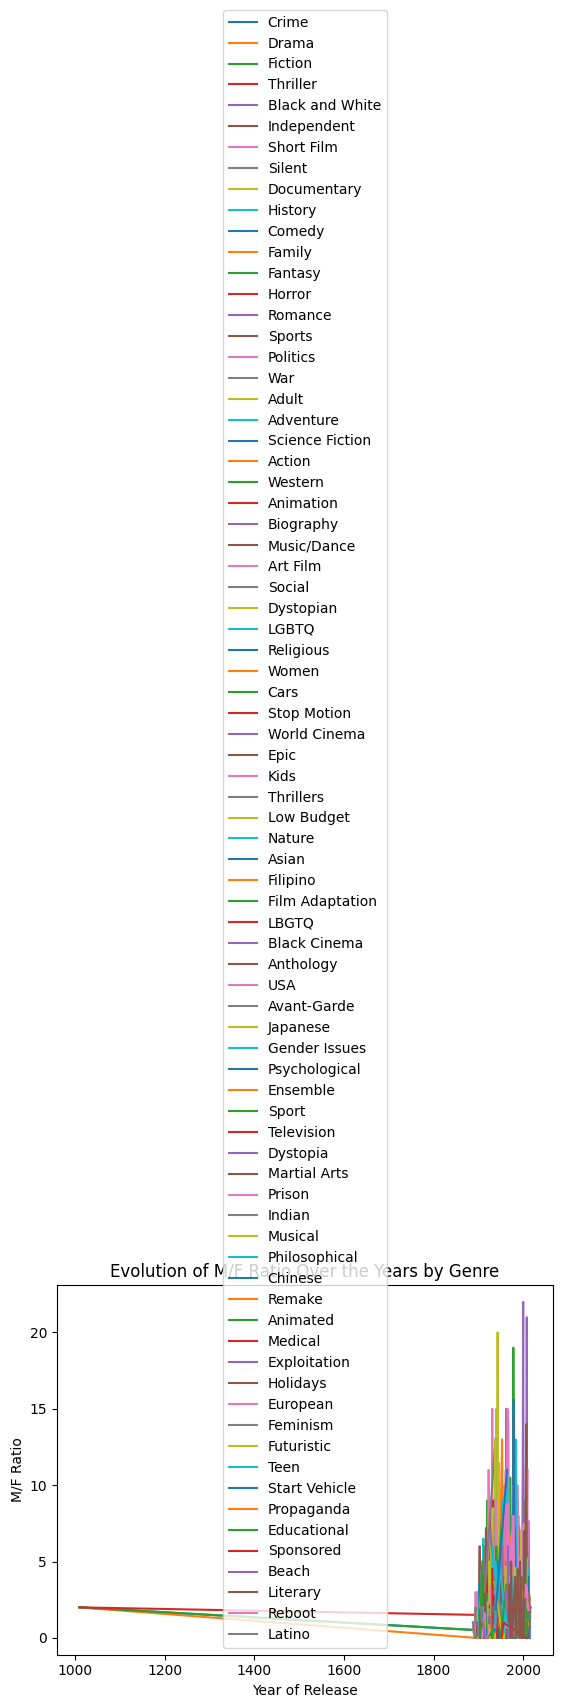

In [51]:
import matplotlib.pyplot as plt

# Resetting the index
gender_pivot_reset = gender_pivot.reset_index()

# Plotting
for genre in gender_pivot_reset['Genres Reduced'].unique():
    genre_data = gender_pivot_reset[gender_pivot_reset['Genres Reduced'] == genre]
    plt.plot(genre_data['Year of Release'], genre_data['M_F_Ratio'], label=genre)

plt.xlabel('Year of Release')
plt.ylabel('M/F Ratio')
plt.title('Evolution of M/F Ratio Over the Years by Genre')
plt.legend()
plt.show()


In [52]:
gender_pivot_reset.head()

Actor gender  Year of Release   Genres Reduced    F     M  M_F_Ratio
0                        1010            Crime  5.0  10.0        2.0
1                        1010            Drama  5.0  10.0        2.0
2                        1010          Fiction  5.0  10.0        2.0
3                        1010         Thriller  5.0  10.0        2.0
4                        1888  Black and White  2.0   2.0        1.0

In [53]:
#I want to keep only the rows where Year of Release is greater than 1888
gender_pivot_reset = gender_pivot_reset[gender_pivot_reset['Year of Release']>1888]

In [54]:
gender_pivot_reset.head()

Actor gender  Year of Release   Genres Reduced   F    M  M_F_Ratio
8                        1891      Independent NaN  1.0        0.0
9                        1891       Short Film NaN  1.0        0.0
10                       1893  Black and White NaN  2.0        0.0
11                       1893      Independent NaN  2.0        0.0
12                       1893       Short Film NaN  2.0        0.0

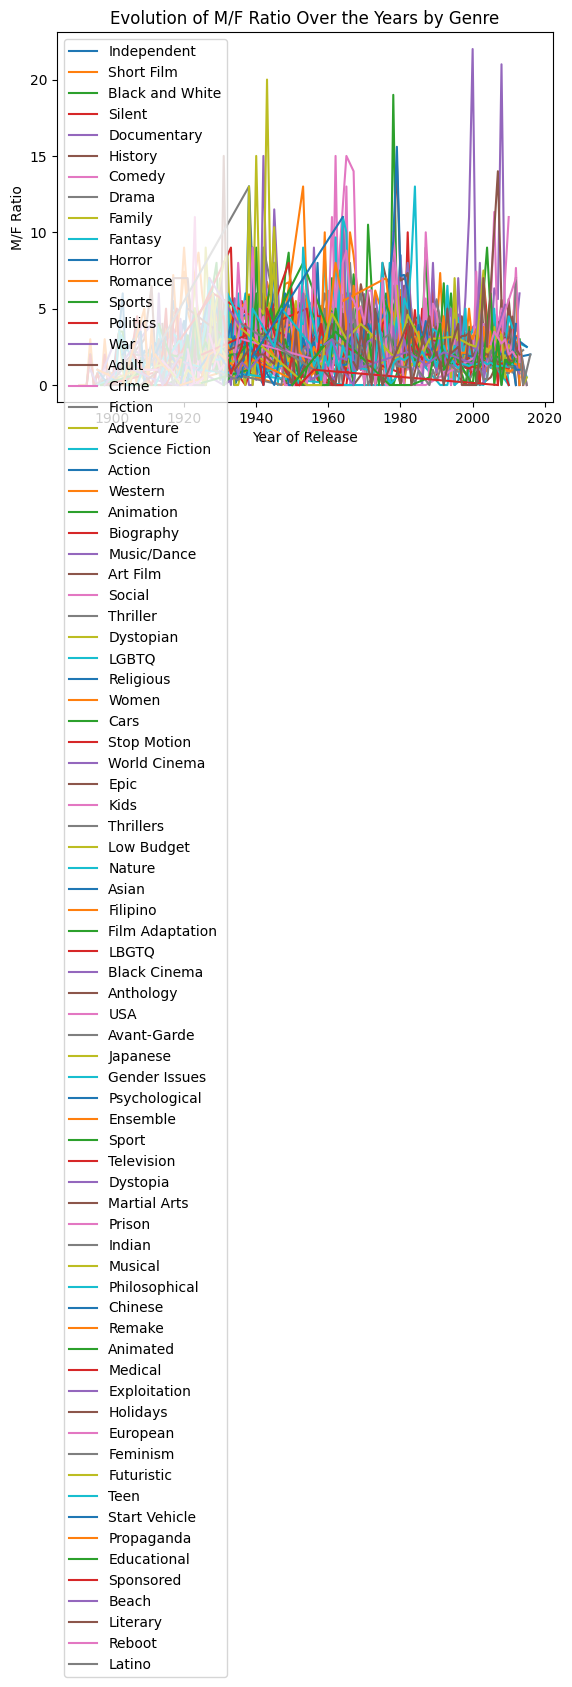

In [55]:
for genre in gender_pivot_reset['Genres Reduced'].unique():
    genre_data = gender_pivot_reset[gender_pivot_reset['Genres Reduced'] == genre]
    plt.plot(genre_data['Year of Release'], genre_data['M_F_Ratio'], label=genre)

plt.xlabel('Year of Release')
plt.ylabel('M/F Ratio')
plt.title('Evolution of M/F Ratio Over the Years by Genre')
plt.legend()
plt.show()

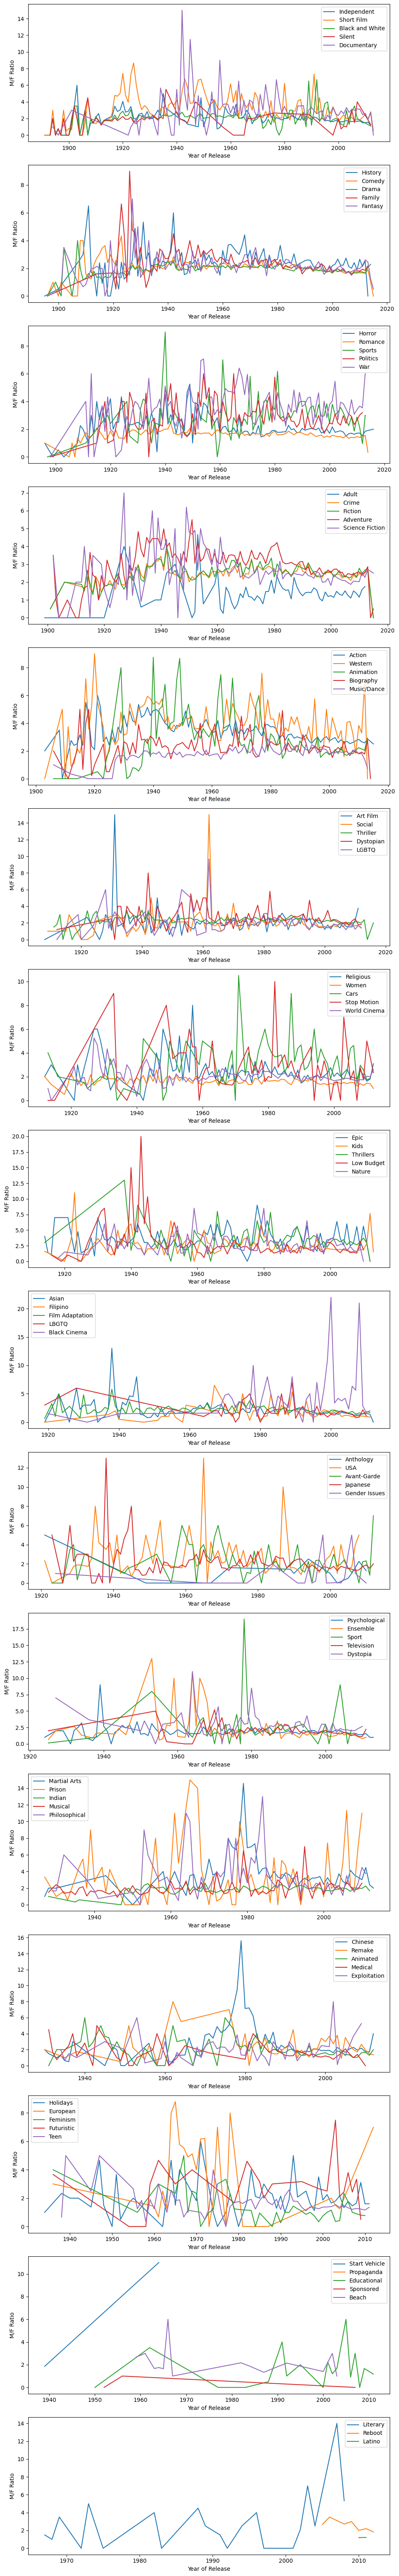

In [56]:
# Determine the number of subplots needed
num_genres = len(gender_pivot_reset['Genres Reduced'].unique())
genres_per_subplot = 5
num_rows = int(np.ceil(num_genres / genres_per_subplot))

# Creating subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows * 4))

# Ensure axes is an array even if there's only one row
if num_rows == 1:
    axes = [axes]

# Plotting data
for index, genre in enumerate(gender_pivot_reset['Genres Reduced'].unique()):
    row = index // genres_per_subplot
    genre_data = gender_pivot_reset[gender_pivot_reset['Genres Reduced'] == genre]
    axes[row].plot(genre_data['Year of Release'], genre_data['M_F_Ratio'], label=genre)
    axes[row].set_xlabel('Year of Release')
    axes[row].set_ylabel('M/F Ratio')
    axes[row].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [58]:
# Calculating the F/M Ratio
gender_pivot_reset['F_M_Ratio'] = gender_pivot_reset['F'] / gender_pivot_reset['M']


In [59]:
gender_pivot_reset.head()

Actor gender  Year of Release   Genres Reduced   F    M  M_F_Ratio  F_M_Ratio
8                        1891      Independent NaN  1.0        0.0        NaN
9                        1891       Short Film NaN  1.0        0.0        NaN
10                       1893  Black and White NaN  2.0        0.0        NaN
11                       1893      Independent NaN  2.0        0.0        NaN
12                       1893       Short Film NaN  2.0        0.0        NaN

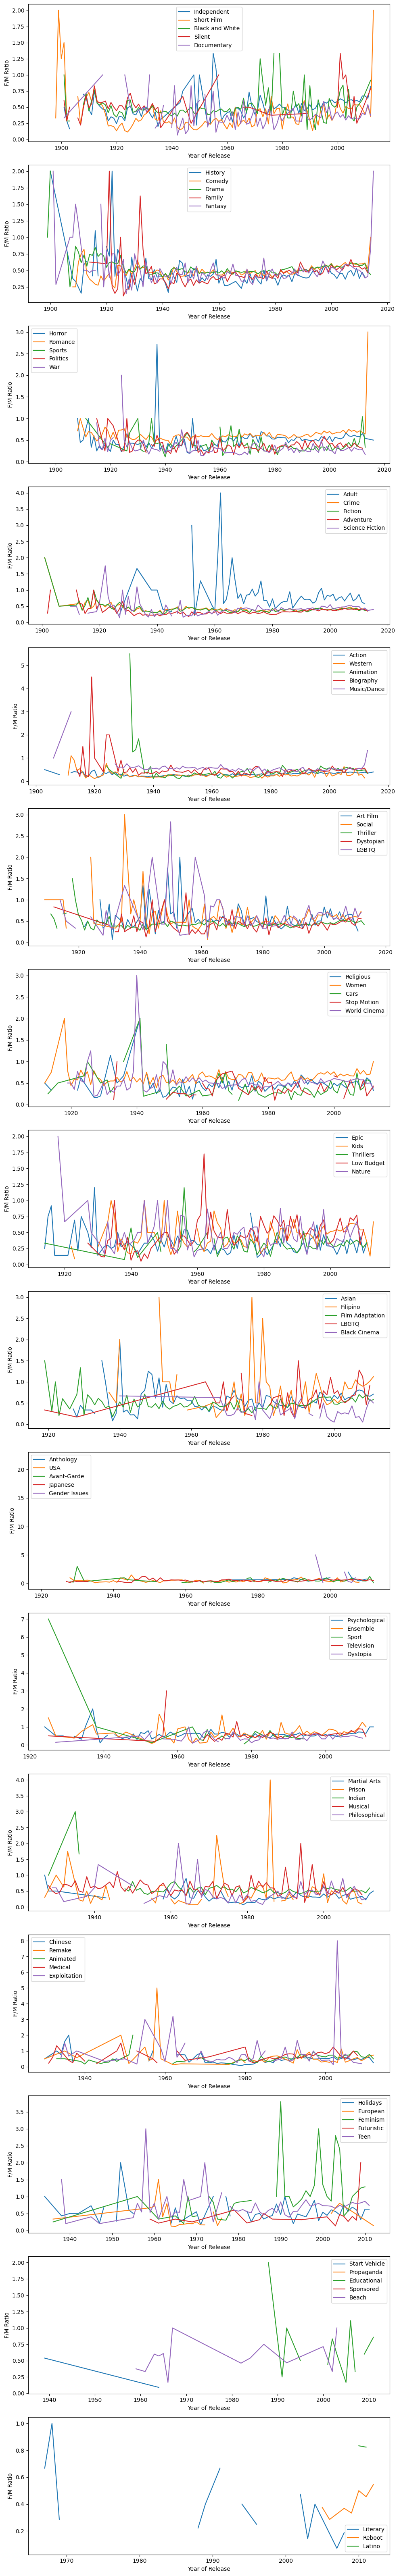

In [60]:
# Determine the number of subplots needed
num_genres = len(gender_pivot_reset['Genres Reduced'].unique())
genres_per_subplot = 5
num_rows = int(np.ceil(num_genres / genres_per_subplot))

# Creating subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows * 4))

# Ensure axes is an array even if there's only one row
if num_rows == 1:
    axes = [axes]

# Plotting data
for index, genre in enumerate(gender_pivot_reset['Genres Reduced'].unique()):
    row = index // genres_per_subplot
    genre_data = gender_pivot_reset[gender_pivot_reset['Genres Reduced'] == genre]
    axes[row].plot(genre_data['Year of Release'], genre_data['F_M_Ratio'], label=genre)
    axes[row].set_xlabel('Year of Release')
    axes[row].set_ylabel('F/M Ratio')
    axes[row].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()